In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random
from scipy.special import gammaincinv, gammainc, gammaincc, gamma, gammainccinv


# Simple exponential

In [3]:
def get_dbt1(N, scale=1.0): 
    x = random.choice([0,1], size=N)
    y = random.exponential(scale=scale, size=N)
    return y * (-1)**x

def get_dbt2(N, scale1=1.01, scale2=0.99): 
    #scale1 = negative side, scale2 = positive side. 
    V = scale1 + scale2 
    dbt = [] 
    for _ in range(N):
        z = random.uniform(0, V)
        dbt.append((-1)*random.exponential(scale=scale1) if z < scale1 else random.exponential(scale=scale2))
    return np.array(dbt)

In [14]:
N = int(1e4)
dbt1 = get_dbt1(N, scale=1.0) 
dbt2 = get_dbt2(N, scale1=6, scale2=0.5)
X1 = boot_fnc(dbt1, np.median, N=1000)
X2 = boot_fnc(dbt2, np.median, N=1000)

width1: 0.011213553944757851
width2: 0.060763946791277154
-4.41879470956514


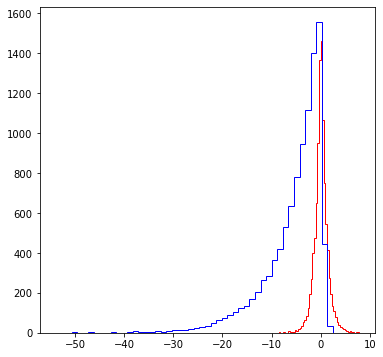

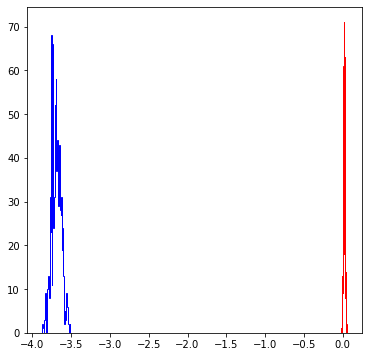

In [15]:
plt.figure(figsize=(6,6))
plt.hist(dbt1, bins=50, color='r', histtype='step')
plt.hist(dbt2, bins=50, color='b', histtype='step')

plt.figure(figsize=(6,6))
plt.hist(X1, bins=50, color='r', histtype='step');
plt.hist(X2, bins=50, color='b', histtype='step');
print('width1:', np.std(X1))
print('width2:', np.std(X2))
print( (np.std(X1)-np.std(X2))/np.std(X1))

# More cuspy exponential

In [32]:
def boot_fnc(dbt, fnc, N=1000):
    results = [] 
    for i in range(N): 
        results.append(fnc(np.random.choice(dbt,len(dbt), replace=True)))
    return results

def inv_G(x, a, n, N): 
    return -1 * ((1/a) * gammainccinv(n, (a**n) * x/(N*n*gamma(n)) ))**(1/n)

def inv_F(x, b, n, N): 
    return ((1/b) * gammaincinv(n, (b**n) * x/(N*n*gamma(n)) ))**(1/n)


def get_dbt(nsamples, n=1, a=1, b=1):
    """
    Assume that distribution is symmetric if `scale2` is not passed in. Otherwise use `scale1`
    for one side and `scale2` for the other.
    """
    N = (1/(n*gamma(n)))*(1/(a**n) + 1/(b**n))**(-1)
    N1 = (1/a**n)*(1/a**n + 1/b**n)**(-1)
    cs = np.array([random.uniform(0,1) for _ in range(nsamples)])
    return np.array([inv_G(c,a,n,N) if c<N1 else inv_F(c-N1,b,n,N) for c in cs ])
    
#     if b is None:
#         x = random.choice([0,1], size=nsamples)
#         cs = cs * A 
#         return inv_F(cs,a,n)*(-1)**x  #randomize whether it's positive or negative. 
    
#     else:
#         B = b**(-n) * gamma(1 + n)
#         cs = cs * (A+B)
#         return np.array([-inv_F(c,a,n) if c<A else inv_F(c,b,n) for c in cs ])
        
    

In [14]:
n=2 
a=1
b=1
N = (1/(n*gamma(n)))*(1/(a**n) + 1/(b**n))**(-1)
N1 = (1/a**n)*(1/a**n + 1/b**n)**(-1)
print(N,N1)

0.25 0.5


In [22]:
inv_G(0.51, 1, 2, 0.25)

nan

In [31]:
inv_F(0.999999999999999999-N1, 1, 2, 0.25)

inf

In [71]:
# ys = get_dbt(int(1e4), 1, a=1)
ys = get_dbt(int(1e4),1.5, 1,1)

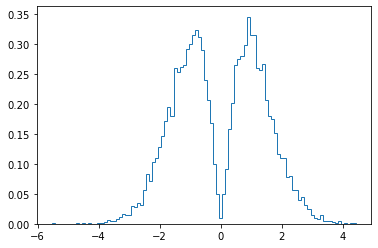

In [75]:
# # plt.hist(ys, bins=50, histtype='step');
plt.hist(ys, bins=100, histtype='step', density=True);

In [11]:
gammainc(2,1e1)

0.9995006007726127

In [14]:
gammaincc(2,0)

1.0